# Feature Engineering

This section of the project will look to Feature Engineer the dataframe that we built in the last notebook to make it more useful for the models we will eventually run. We will identify which columns contain categorical data and look to use the get_dummies function on pandas to split each categorical variable into a binary column. Furthermore, any column with 2 categorical variables, we will look to convert into binary. Once this is completed, we will create a correlation heatmap using Seaborn in order to identify any features which have multicolinearity. We will then consider each feature on a case by case basis.

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
# import xgboost as xgb
import itertools
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
#Reading in the dataframe and saving it under data.
data = pd.read_csv('../Data/data_final.csv')

In [4]:
#Checking the head.
data.head()

,Date,index,age,job,marital,education,default,housing,loan,contact,...,MOM Inflation,Wage Growth,EURUSD,euro zoneGDP Growth Rate,Portugal Income Tax annual rate,Portugal Bank Lending Rate,Portugal Personal Savings,Portugal Wages,Portugal Unemployment Rate,Portugal Sales Tax
0,2008-05-29,0,56,housemaid,married,basic.4y,no,no,no,telephone,...,0.4,7.2,1.5516,0.5,42.0,7.66,6.3,1063.38,7.6,20.0
1,2008-05-29,1,57,services,married,high.school,unknown,no,no,telephone,...,0.4,7.2,1.5516,0.5,42.0,7.66,6.3,1063.38,7.6,20.0
2,2008-05-29,2,37,services,married,high.school,no,yes,no,telephone,...,0.4,7.2,1.5516,0.5,42.0,7.66,6.3,1063.38,7.6,20.0
3,2008-05-29,3,40,admin.,married,basic.6y,no,no,no,telephone,...,0.4,7.2,1.5516,0.5,42.0,7.66,6.3,1063.38,7.6,20.0
4,2008-05-29,4,56,services,married,high.school,no,no,yes,telephone,...,0.4,7.2,1.5516,0.5,42.0,7.66,6.3,1063.38,7.6,20.0


We can drop the columns labeled Date and index as these are not important for our final model.

In [5]:
#Dropping Date and index.
data.drop(columns=['Date','index'], inplace=True)

In [6]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,MOM Inflation,Wage Growth,EURUSD,euro zoneGDP Growth Rate,Portugal Income Tax annual rate,Portugal Bank Lending Rate,Portugal Personal Savings,Portugal Wages,Portugal Unemployment Rate,Portugal Sales Tax
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0.4,7.2,1.5516,0.5,42.0,7.66,6.3,1063.38,7.6,20.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0.4,7.2,1.5516,0.5,42.0,7.66,6.3,1063.38,7.6,20.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0.4,7.2,1.5516,0.5,42.0,7.66,6.3,1063.38,7.6,20.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0.4,7.2,1.5516,0.5,42.0,7.66,6.3,1063.38,7.6,20.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0.4,7.2,1.5516,0.5,42.0,7.66,6.3,1063.38,7.6,20.0


We can change the '.' and the whitespace in the column names into '_' for ease of use going forward.

In [7]:
#replacing the white spaces with '-', replacing the '.' with '-'
data.columns = data.columns.str.replace(' ', '_')
data.columns = data.columns.str.replace('.', '_')

In [8]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,MOM_Inflation,Wage_Growth,EURUSD,euro_zoneGDP_Growth_Rate,Portugal_Income_Tax_annual_rate,Portugal_Bank_Lending_Rate,Portugal_Personal_Savings,Portugal_Wages,Portugal_Unemployment_Rate,Portugal_Sales_Tax
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,0.4,7.2,1.5516,0.5,42.0,7.66,6.3,1063.38,7.6,20.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0.4,7.2,1.5516,0.5,42.0,7.66,6.3,1063.38,7.6,20.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,0.4,7.2,1.5516,0.5,42.0,7.66,6.3,1063.38,7.6,20.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,0.4,7.2,1.5516,0.5,42.0,7.66,6.3,1063.38,7.6,20.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,0.4,7.2,1.5516,0.5,42.0,7.66,6.3,1063.38,7.6,20.0


We will now create a loop to see the value counts of each column to help identify the categorical data.

In [9]:
#Creating a list of column names.
data_col = list(data.columns)

In [10]:
#Looping through the data_col list and creating value_counts for each.
for col in data_col:
    print('Values for {}:\n{}\n\n'.format(col, data[col].value_counts()))

Values for age:
31    1947
32    1846
33    1833
36    1780
35    1759
      ... 
89       2
91       2
87       1
94       1
95       1
Name: age, Length: 78, dtype: int64


Values for job:
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64


Values for marital:
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64


Values for education:
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64


Values for default:
no         32588
unknown     8597
yes            3
Name: default, dtype: int64


We can look to create subgroups for the Age column. In order to do this, we will use the date age groups typically used by banks. The subgroups are as follows:

16-24,
25-34,
35-44,
45-54,
55-64,
65-74,
75-79,
80+.

In [11]:
data['age'].max()

98

In [12]:
data['age'].min()

17

In [13]:
#Using loc function to assign the Age Groups defined above into a new column Age_Group.
data.loc[((data['age'] >= 16 ) & (data['age'] <= 24 )), 'Age_Group'] = '16-24'
data.loc[((data['age'] >= 25 ) & (data['age'] <= 34 )), 'Age_Group'] = '25-34'
data.loc[((data['age'] >= 35 ) & (data['age'] <= 44 )), 'Age_Group'] = '35-44'
data.loc[((data['age'] >= 45 ) & (data['age'] <= 54 )), 'Age_Group'] = '45-54'
data.loc[((data['age'] >= 55 ) & (data['age'] <= 64 )), 'Age_Group'] = '55-64'
data.loc[((data['age'] >= 65 ) & (data['age'] <= 74 )), 'Age_Group'] = '65-74'
data.loc[((data['age'] >= 75 ) & (data['age'] <= 79 )), 'Age_Group'] = '75-79'
data.loc[((data['age'] >= 80 )), 'Age_Group'] = '80+'

In [14]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,Wage_Growth,EURUSD,euro_zoneGDP_Growth_Rate,Portugal_Income_Tax_annual_rate,Portugal_Bank_Lending_Rate,Portugal_Personal_Savings,Portugal_Wages,Portugal_Unemployment_Rate,Portugal_Sales_Tax,Age_Group
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,7.2,1.5516,0.5,42.0,7.66,6.3,1063.38,7.6,20.0,55-64
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,7.2,1.5516,0.5,42.0,7.66,6.3,1063.38,7.6,20.0,55-64
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,7.2,1.5516,0.5,42.0,7.66,6.3,1063.38,7.6,20.0,35-44
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,7.2,1.5516,0.5,42.0,7.66,6.3,1063.38,7.6,20.0,35-44
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,7.2,1.5516,0.5,42.0,7.66,6.3,1063.38,7.6,20.0,55-64


In [15]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y', 'MOM_Inflation',
       'Wage_Growth', 'EURUSD', 'euro_zoneGDP_Growth_Rate',
       'Portugal_Income_Tax_annual_rate', 'Portugal_Bank_Lending_Rate',
       'Portugal_Personal_Savings', 'Portugal_Wages',
       'Portugal_Unemployment_Rate', 'Portugal_Sales_Tax', 'Age_Group'],
      dtype='object')

## Binary Data Columns

In [16]:
data['contact'].unique()

array(['telephone', 'cellular'], dtype=object)

In [17]:
data['contact'].replace('telephone',1, inplace=True)
data['contact'].replace('cellular',0, inplace=True)

In [18]:
data['contact'].value_counts(dropna=False)

0    26144
1    15044
Name: contact, dtype: int64

change to numbers - month / day of the week

In [19]:
data['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [20]:
data['y'].replace('yes',1, inplace=True)
data['y'].replace('no',0, inplace=True)

In [21]:
data['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

In [22]:
data['month'].replace('mar',3, inplace=True)
data['month'].replace('apr',4, inplace=True)
data['month'].replace('may',5, inplace=True)
data['month'].replace('jun',6, inplace=True)
data['month'].replace('jul',7, inplace=True)
data['month'].replace('aug',8, inplace=True)
data['month'].replace('sep',9, inplace=True)
data['month'].replace('oct',10, inplace=True)
data['month'].replace('nov',11, inplace=True)
data['month'].replace('dec',12, inplace=True)

In [23]:
data['day_of_week'].value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

In [24]:
data['day_of_week'].replace('mon',1, inplace=True)
data['day_of_week'].replace('tue',2, inplace=True)
data['day_of_week'].replace('wed',3, inplace=True)
data['day_of_week'].replace('thu',4, inplace=True)
data['day_of_week'].replace('fri',5, inplace=True)

## Columns to create Dummy Variables from.
job, 
education, 
default, 
loan

### job

In [25]:
job_dummy = pd.get_dummies(data['job'], prefix='job')

In [26]:
job_dummy.drop(columns='job_unknown',axis=1, inplace=True)

In [27]:
job_dummy.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0


### education

In [28]:
edu_dummy = pd.get_dummies(data['education'], prefix='edu')

In [29]:
len(edu_dummy.columns)

8

In [30]:
edu_dummy.drop(columns='edu_unknown',axis=1, inplace=True)

In [31]:
len(edu_dummy.columns)

7

In [32]:
edu_dummy.head()

,edu_basic.4y,edu_basic.6y,edu_basic.9y,edu_high.school,edu_illiterate,edu_professional.course,edu_university.degree
0,1,0,0,0,0,0,0
1,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0
4,0,0,0,1,0,0,0


### default

In [33]:
default_dummy = pd.get_dummies(data['default'], prefix='default')

In [34]:
len(default_dummy.columns)

3

In [35]:
default_dummy.columns

Index(['default_no', 'default_unknown', 'default_yes'], dtype='object')

In [36]:
default_dummy.drop(columns='default_unknown', axis=1, inplace=True)

In [37]:
len(default_dummy.columns)

2

In [38]:
default_dummy.head()

,default_no,default_yes
0,1,0
1,0,0
2,1,0
3,1,0
4,1,0


### poutcome

In [39]:
poutcome_dummy = pd.get_dummies(data['poutcome'], prefix='poutcome', drop_first=True)

In [40]:
len(poutcome_dummy.columns)

2

In [41]:
poutcome_dummy.head()

,poutcome_nonexistent,poutcome_success
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


### marital

In [42]:
marital_dummy = pd.get_dummies(data['marital'], prefix='marital')

In [43]:
len(marital_dummy.columns)

4

In [44]:
marital_dummy.drop(columns='marital_unknown', axis=1, inplace=True)

In [45]:
len(marital_dummy.columns)

3

In [46]:
marital_dummy.head()

,marital_divorced,marital_married,marital_single
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


### housing

In [47]:
housing_dummy = pd.get_dummies(data['housing'], prefix='housing')

In [48]:
len(housing_dummy.columns)

3

In [49]:
housing_dummy.drop(columns='housing_unknown', axis=1, inplace=True)

In [50]:
len(housing_dummy.columns)

2

In [51]:
housing_dummy.head()

,housing_no,housing_yes
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


### loan

In [52]:
loan_dummy = pd.get_dummies(data['loan'], prefix='loan')

In [53]:
len(loan_dummy.columns)

3

In [54]:
loan_dummy.drop(columns='loan_unknown', axis=1, inplace=True)

In [55]:
len(loan_dummy.columns)

2

In [56]:
loan_dummy.head()

,loan_no,loan_yes
0,1,0
1,1,0
2,1,0
3,1,0
4,0,1


### Age_Group

In [57]:
age_group_dummy = pd.get_dummies(data['Age_Group'], prefix='age_group')

In [58]:
len(age_group_dummy.columns)

8

In [59]:
age_group_dummy.drop(columns='age_group_80+', axis=1, inplace=True)

In [60]:
len(age_group_dummy.columns)

7

Now that we have created individual dataframes for each column that we have turned into dummy variables, we will merge these all and drop the original columns from our dataframe. 

In [81]:
data_merged = pd.concat([data, loan_dummy, housing_dummy, marital_dummy, poutcome_dummy, default_dummy, edu_dummy, job_dummy, age_group_dummy], axis=1)

In [82]:
data_cleaned = data_merged.drop(columns=['age','loan','housing','marital','poutcome','default','education','job','Age_Group'],axis=1)

We will also drop the duration column, as indicated on the UCI website, this column highly affects the output target (e.g., if duration=0 then y='no'). Therefore, for more realistic predictions on our final model, we will drop this entirely.

In [83]:
data_cleaned = data_cleaned.drop(columns=['duration'],axis=1)

## Checking for Multicolinearity

This section will look for multicolinearity between the variables. We will look to identify any features which have multicolinearity above 0.70. We will treat each of them on a case by case basis, and deduce a method to handle them.

In [84]:
#Setting up the correlation function.
corr = np.triu(data_cleaned.corr())

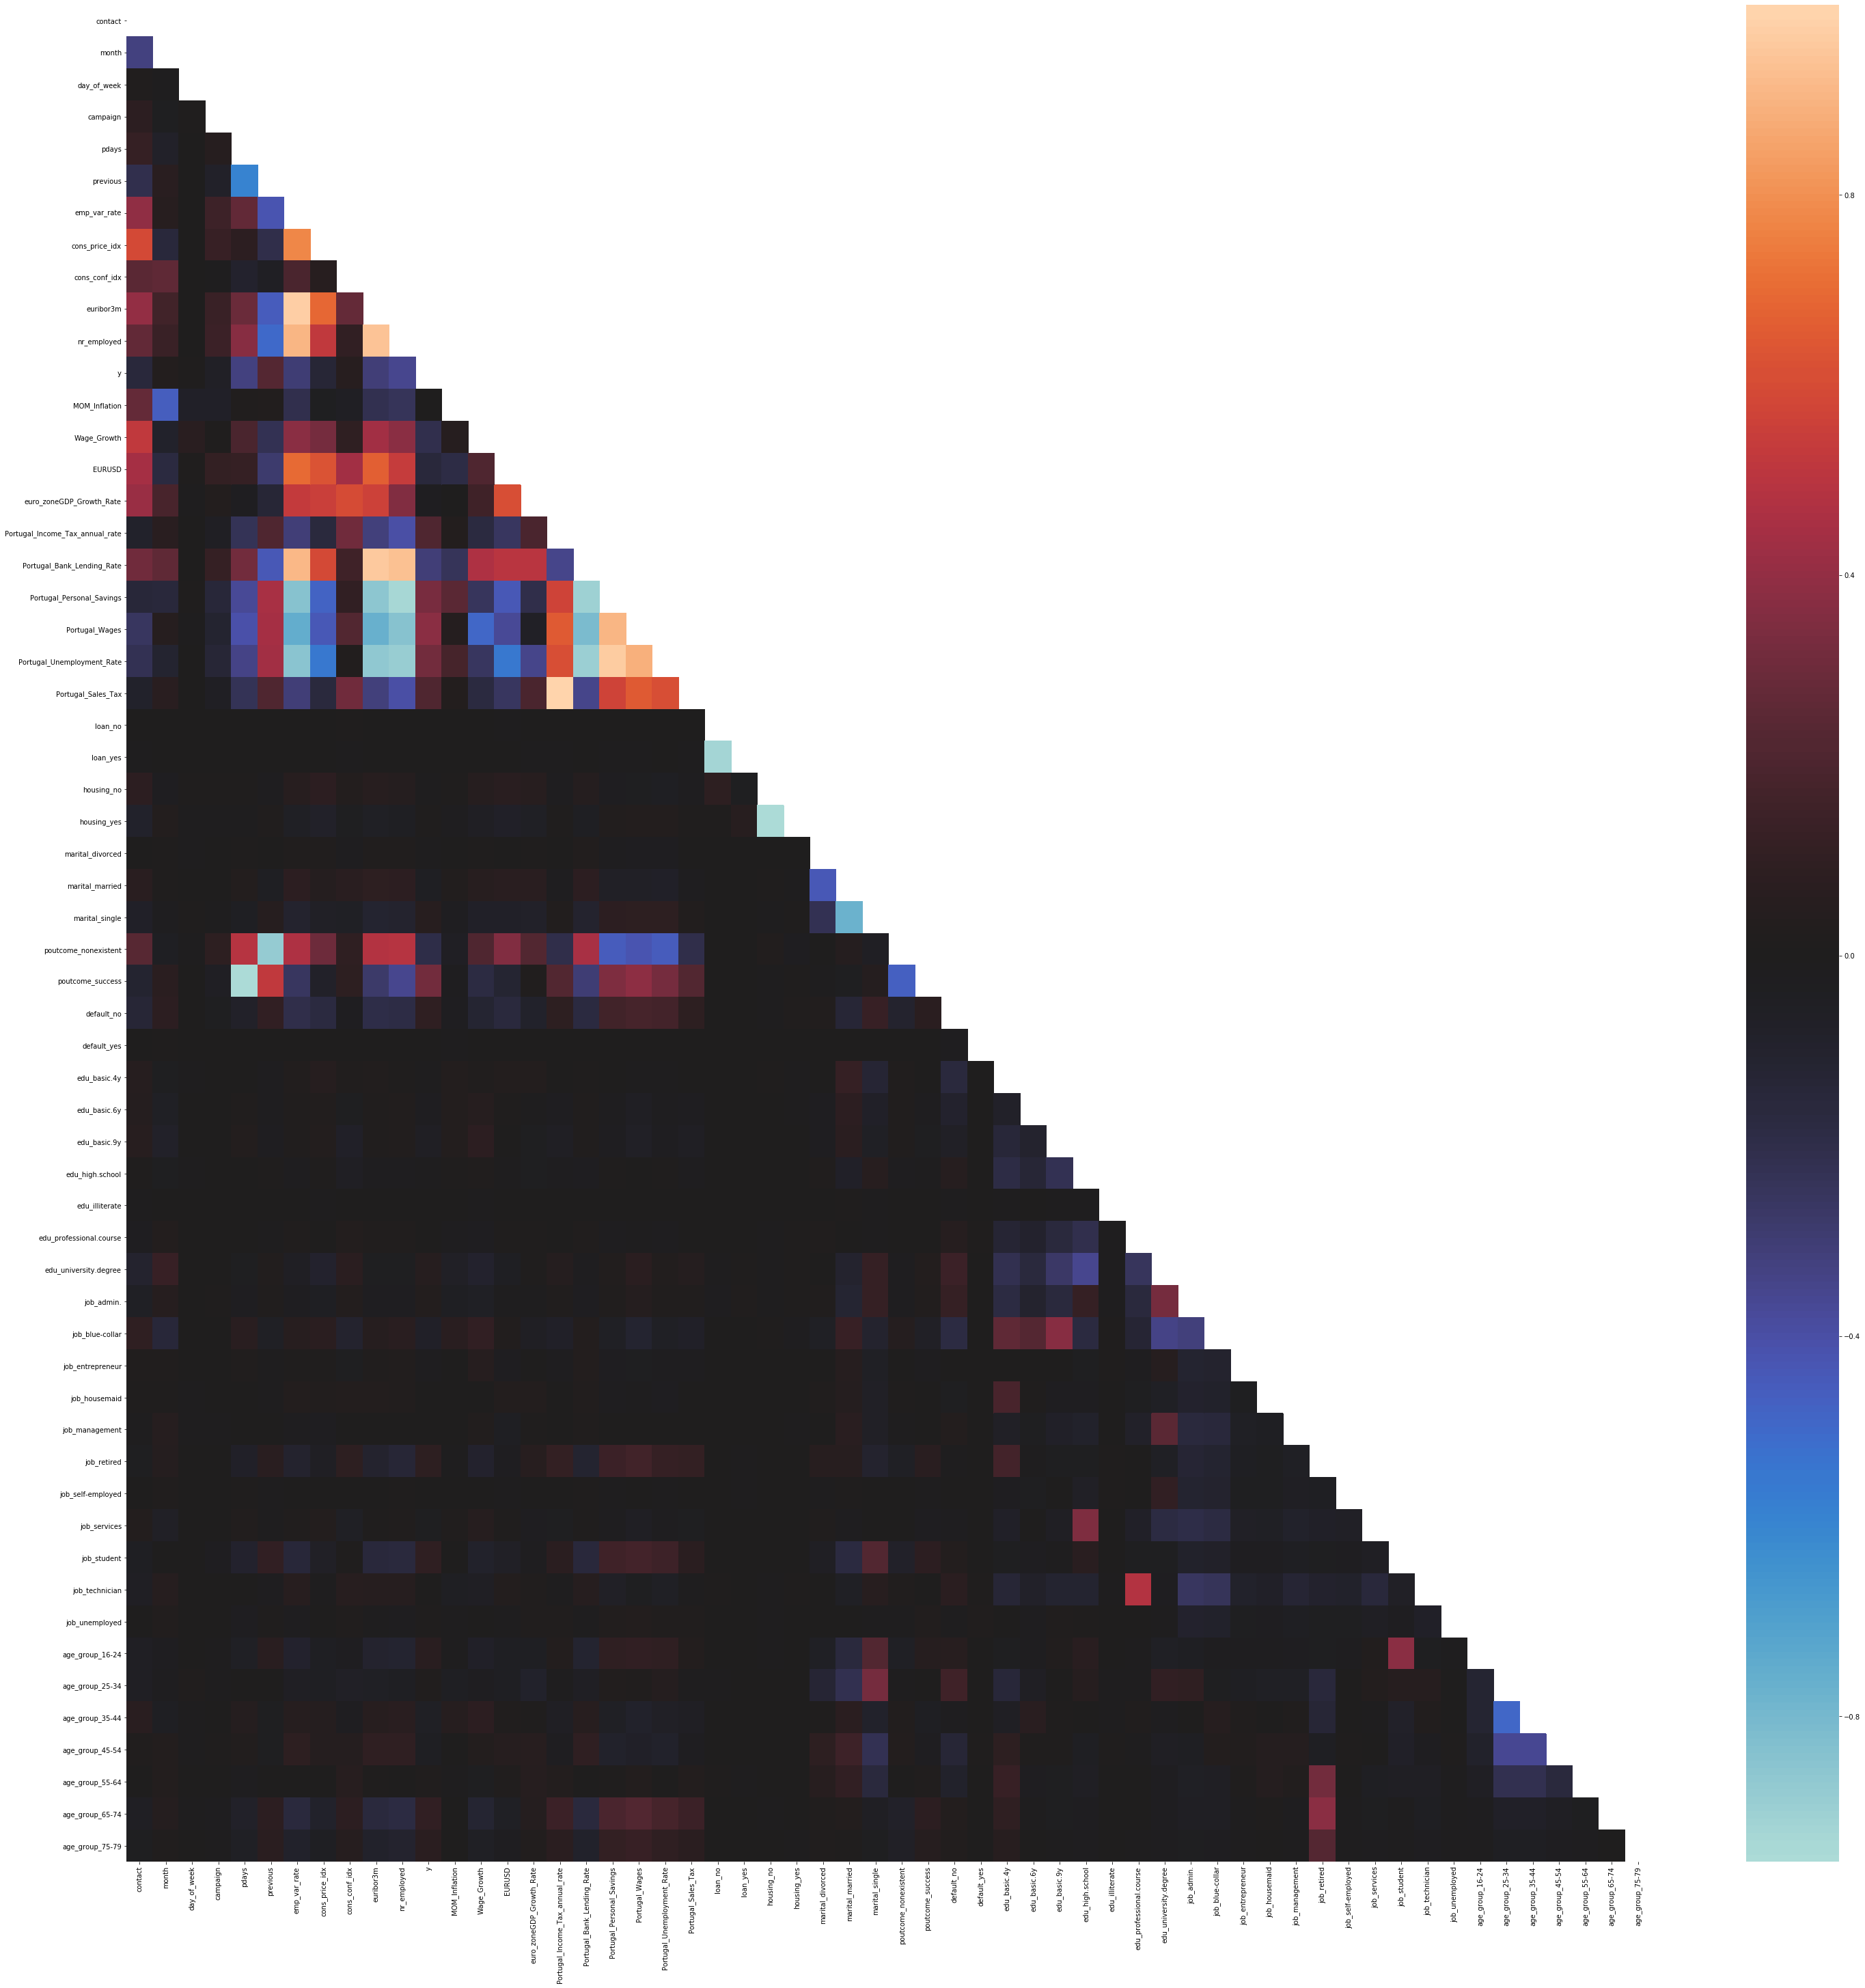

In [85]:
#Plotting a Correlation Matrix
plt.figure(figsize=(50,50))
sns.heatmap(data_cleaned.corr(), center=0, mask=corr)
plt.show();

The correlation heatmap we have plotted above clearly does show some variables which have high colinearity between each other. We will need to investigate deeper to identify these.

We will do so by changing the colour into a scheme which is more readable, and also plot the actual correlation in each box.

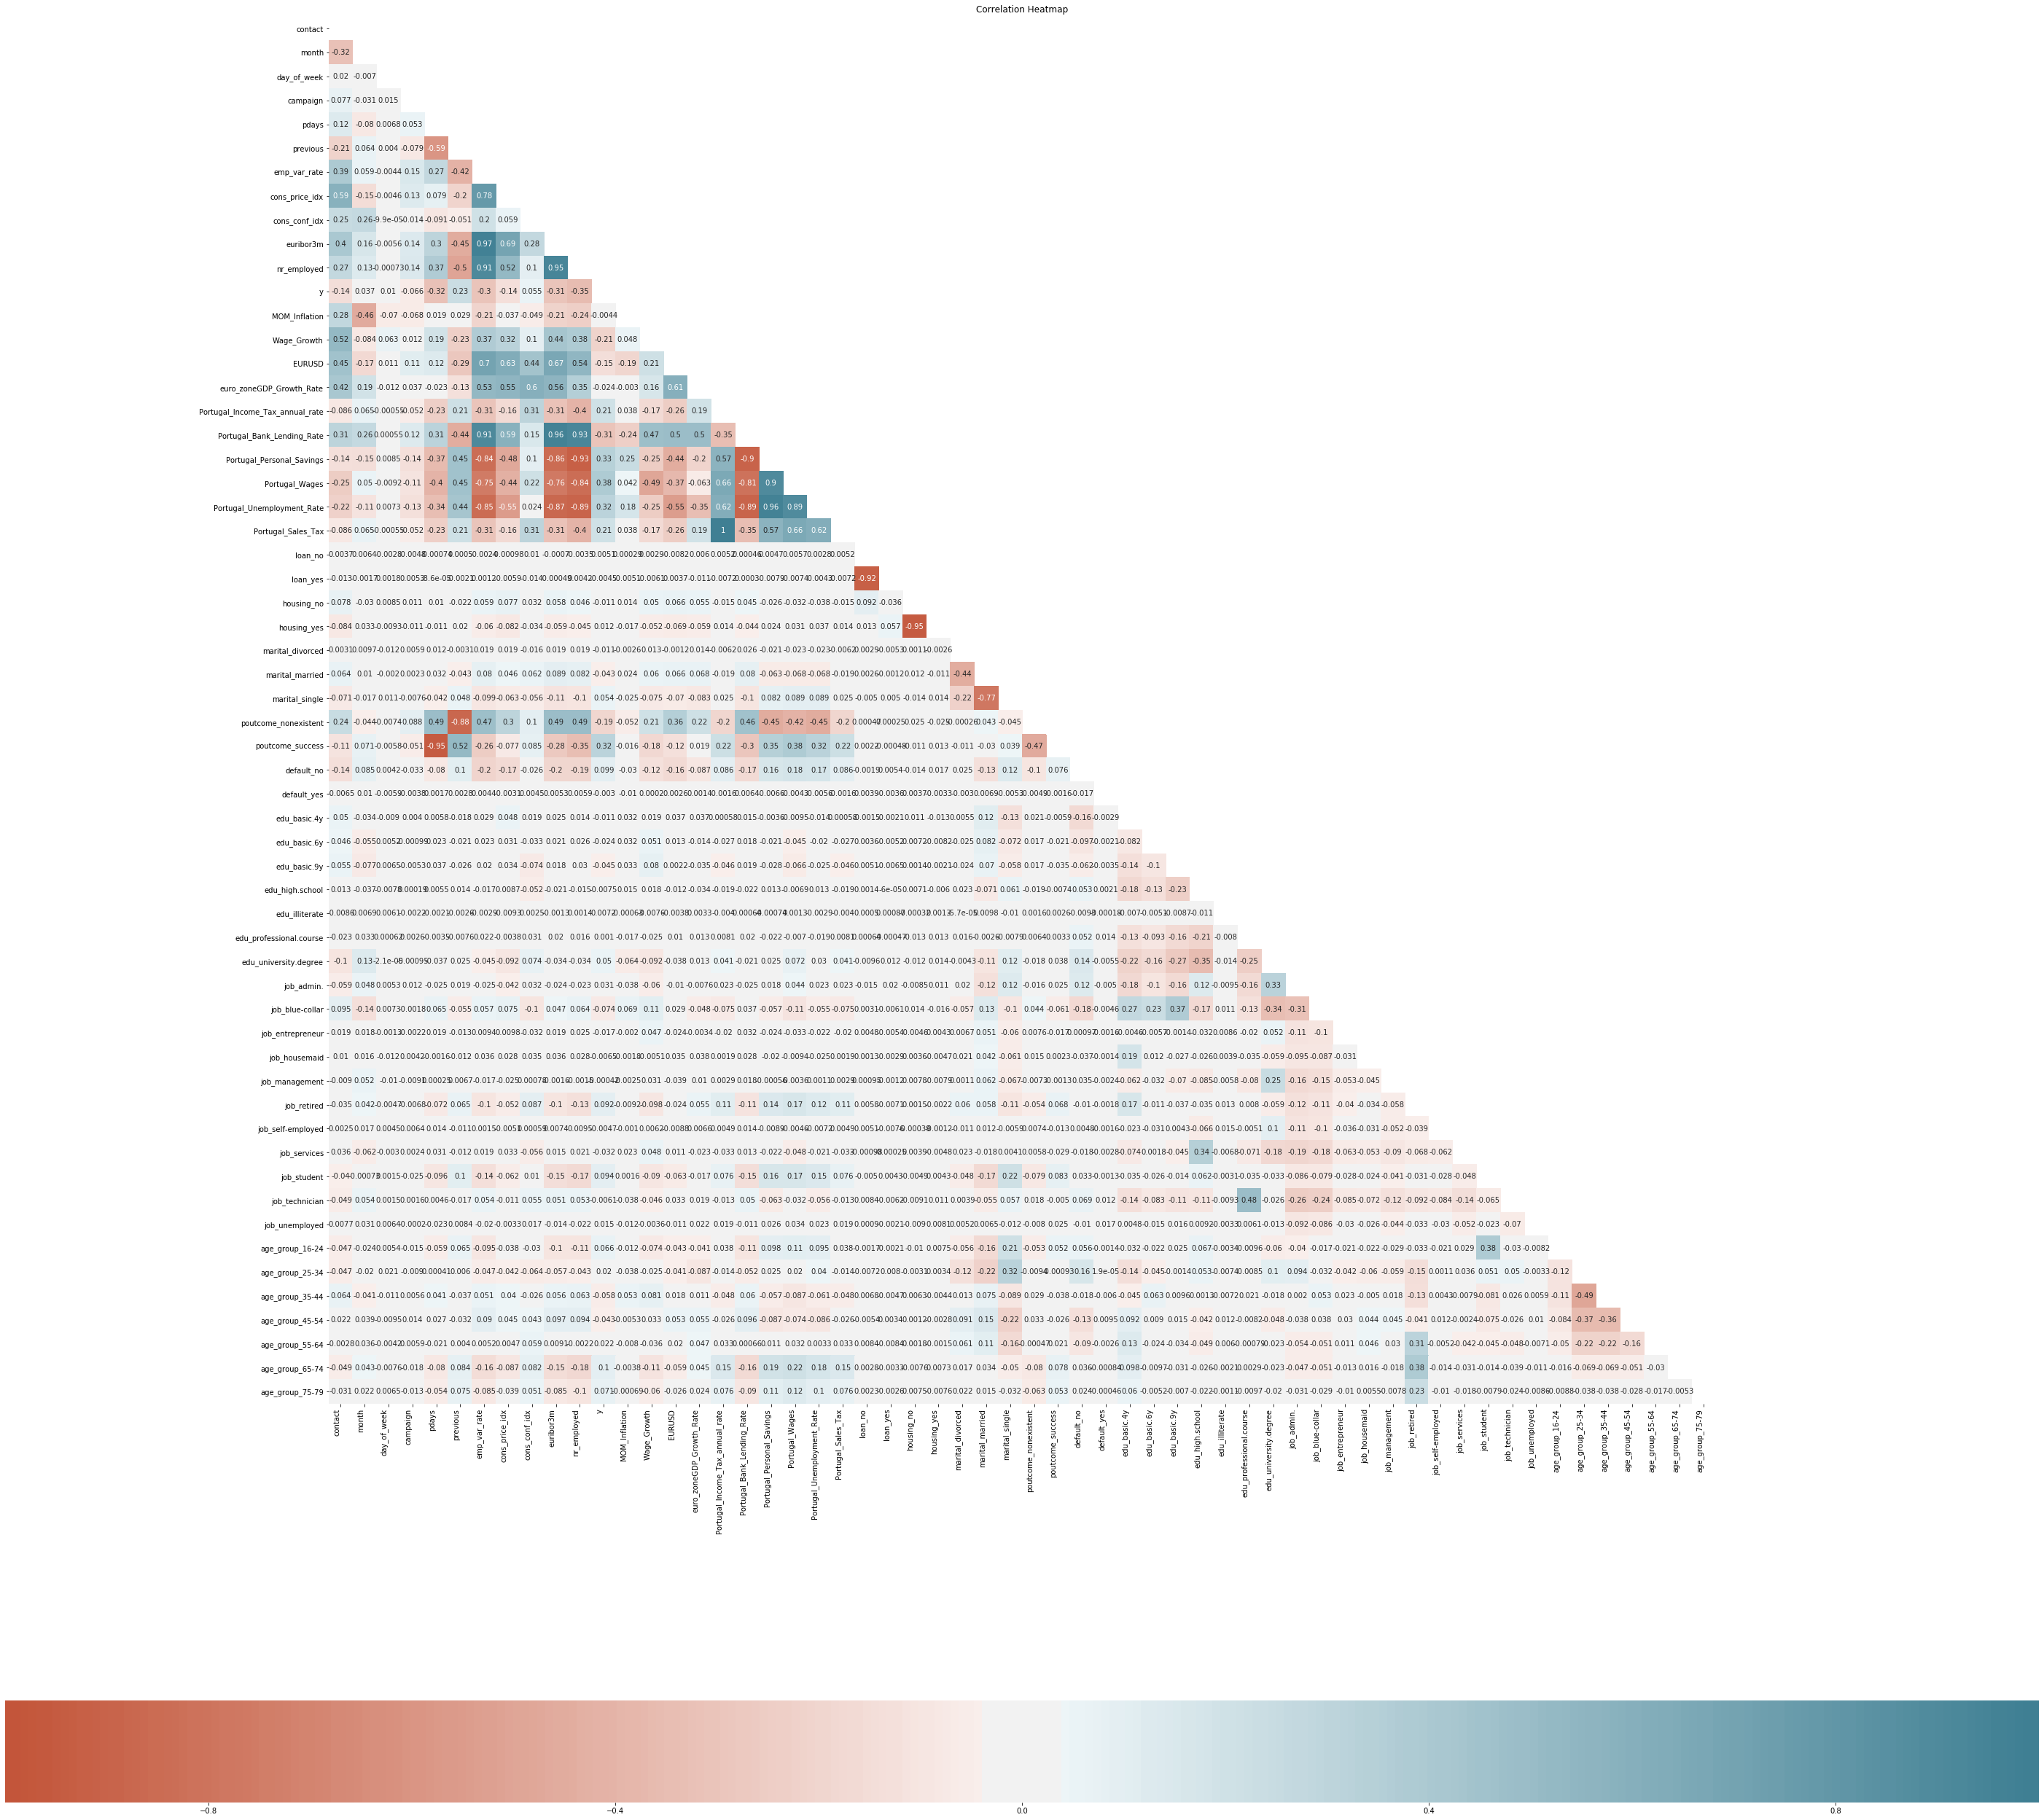

''

In [86]:
#Plotting a customised correlation heatmap.

plt.figure(figsize=(50,50))
ax = sns.heatmap(
    data_cleaned.corr(), 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True,
    cbar_kws= {'orientation': 'horizontal'},
    mask = corr
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    horizontalalignment='right'
)
plt.title('Correlation Heatmap')
plt.show()
;

While the plot above is slightly better, we will customise furhter, highlighting the features which have colinearity above 0.70.

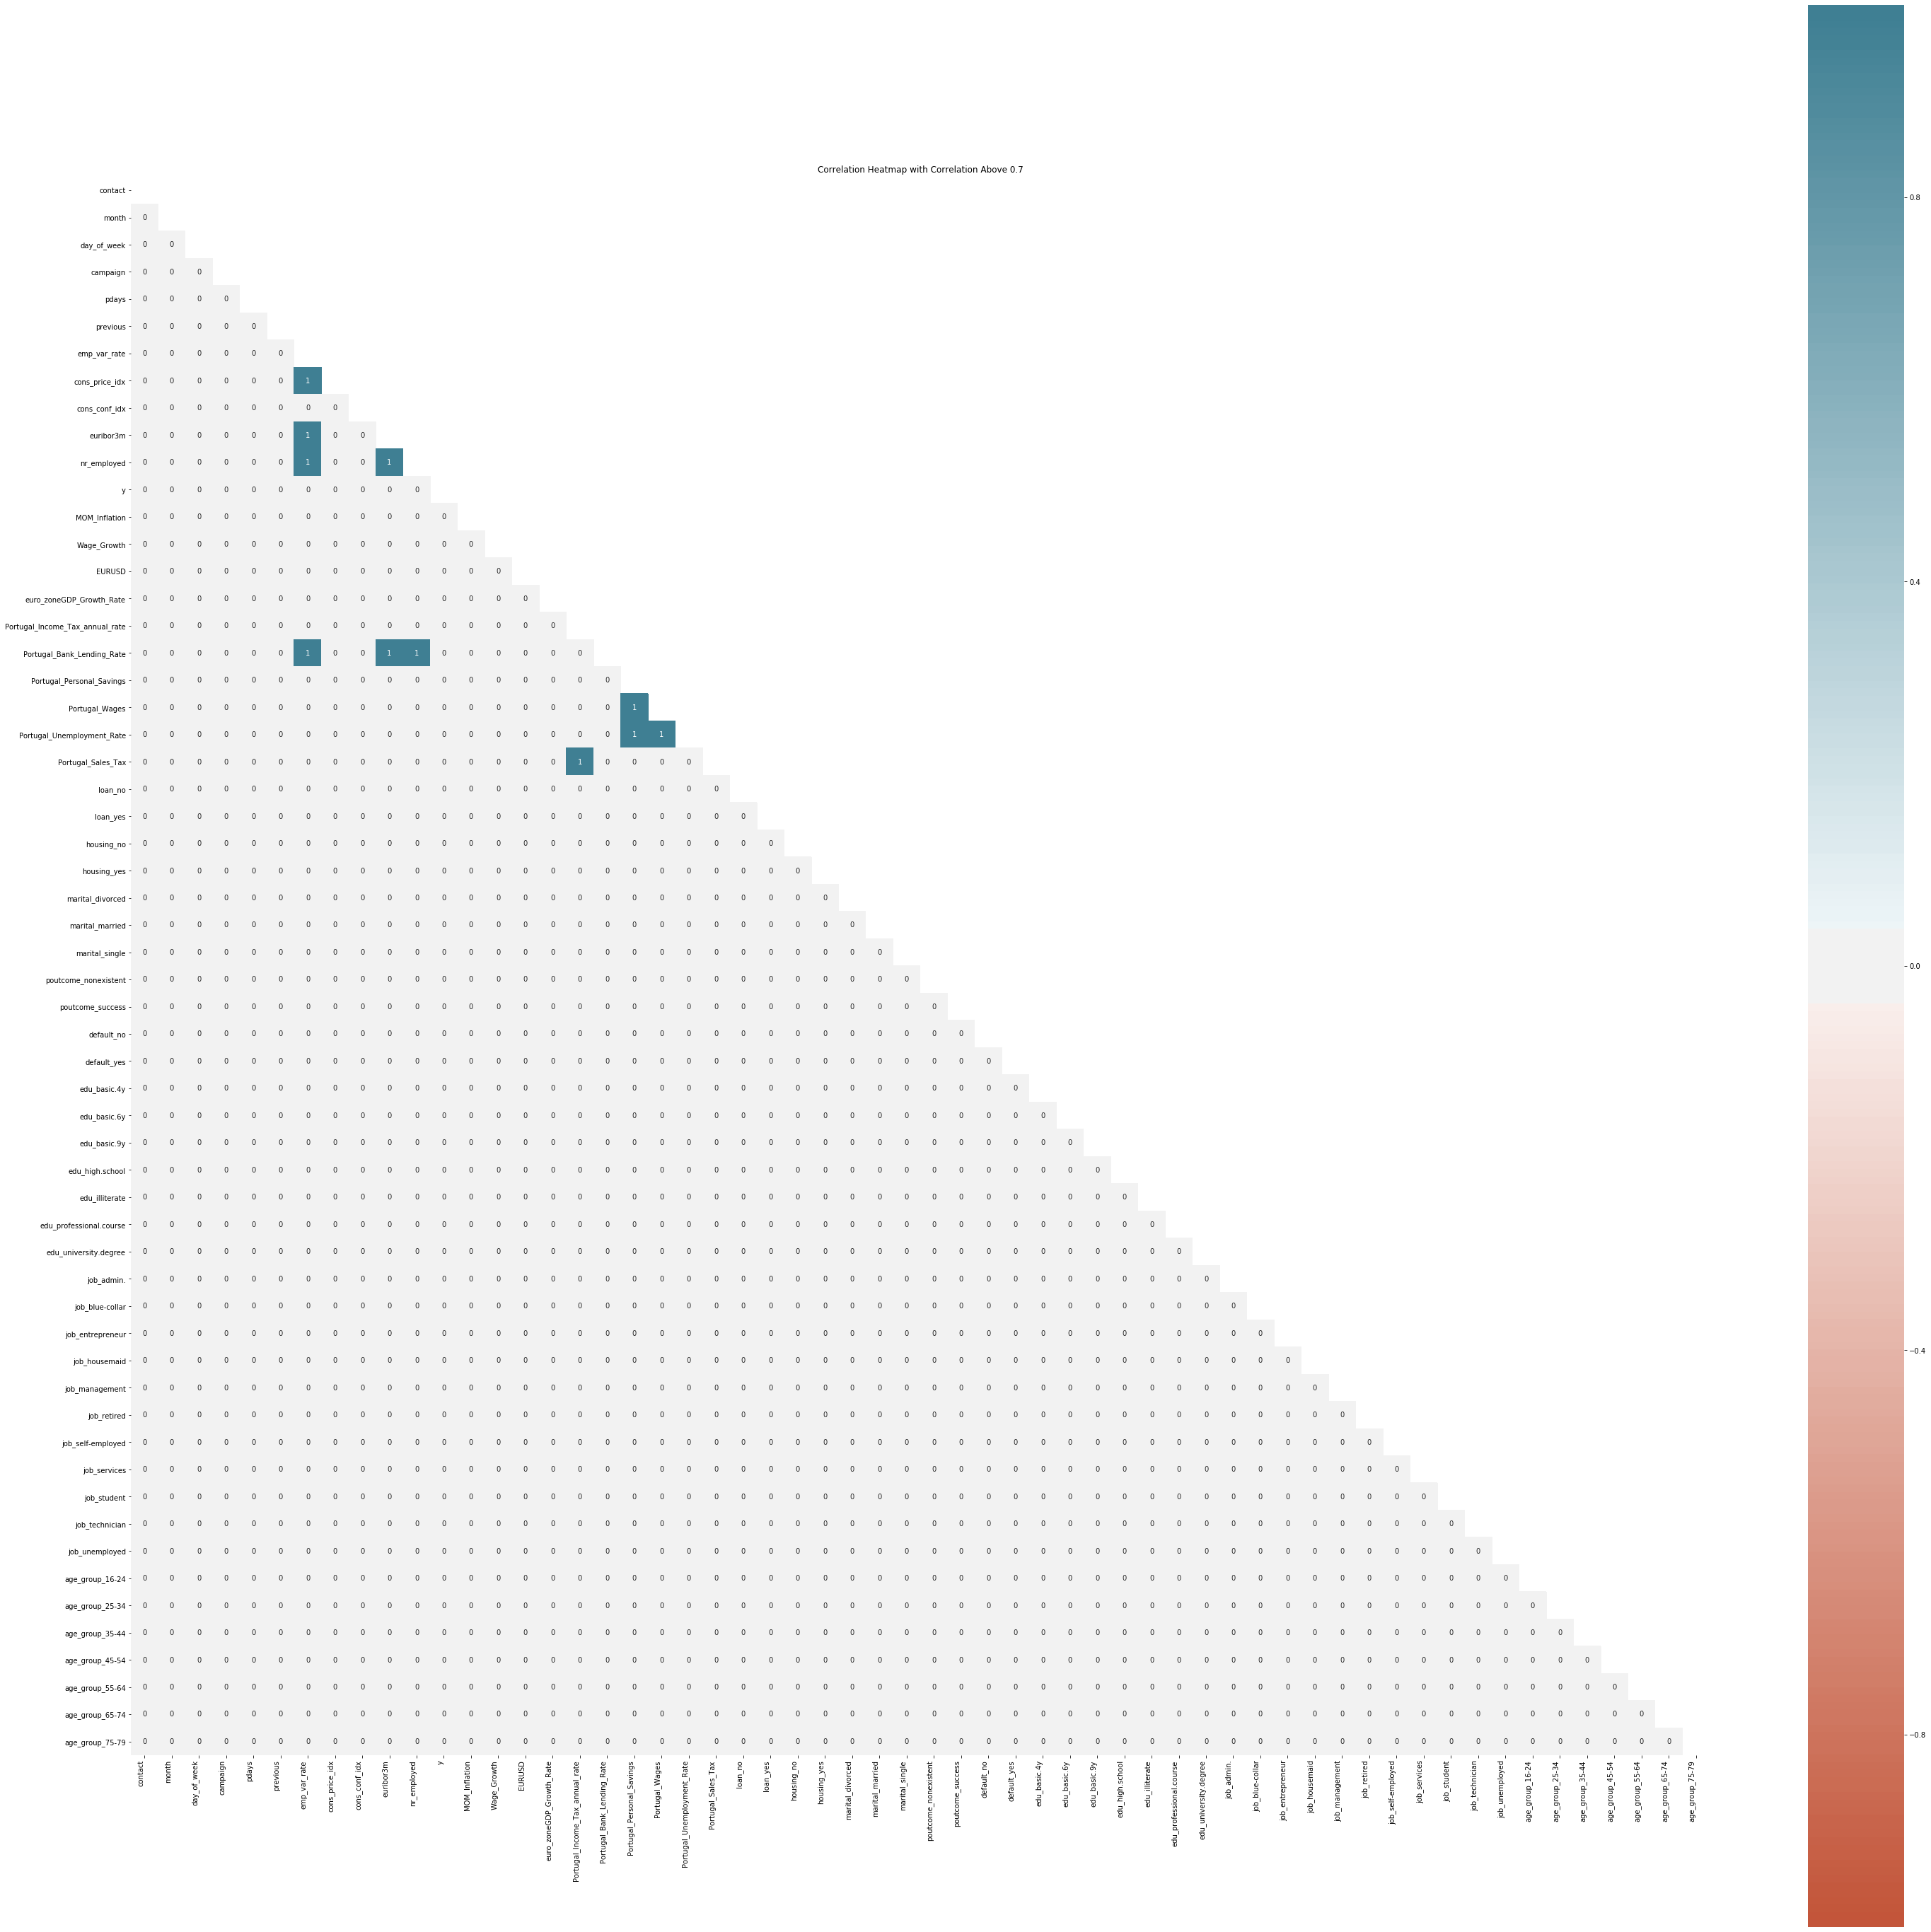

''

In [87]:
#Plotting a customised correlation heatmap.
plt.figure(figsize=(50,50))
ax = sns.heatmap(
    data_cleaned.corr()>0.7, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True,
    mask = corr,
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    horizontalalignment='right'
)
plt.title('Correlation Heatmap with Correlation Above 0.7'),
plt.show()
;

The correlation heatmap above clearly shows us which features we need to target.

1) emp_var_rate: Strong correlation with cons_price_idx, euribor3m, nr_employed, portugal_bank_lending. We will drop emp_var_rate entirely. We have another feature for Portugal_Unemployment_Rate. This variable will be able to capture any impact of Unemployment on our target variable. So we can do with dropping emp_var_rate entirely.

2) euribor3m: Strong correlation with nr_employemt and Portugal_Bank_Lending_Rate. We will drop the nr_emplopyed and Portugal_Bank_Lending_Rate features. Again, our Portugal_Unemployment_Rate feature will capture any impact of Unemployment, and the Portugal_Bank_Lending_Rate will be directly influenced by the euribor3m feautre. As such, it makes sense to drop these 2 features entirely.

3) nr_employed: Strong correlation with Portugal_Bank_Lending_Rate. We have already decided to drop these 2 features.

4) Income_tax: Strong correlation with Sales_Tax. Again it makes sense as to why these two variables would move in tandem. Rather than dropping 1 of them, we will look to add these 2 features together and make a combined tax variable. This would allow us to capture any nuances in the difference in movement of any 1 of these features, and would represent the total income and sales tax paid on average in the country. The new column will be called Combined_Tax.

5) Portugal_Personal_Savings: Strong correlation with Portugal_Wages and Portugal_Unemployment_Rate. All 3 of these features would be important to our model, and so instead of dropping any of these, we will create a new feature called Feature_2 which will multiply all 3 of these features together.

6) Portugal_Personal_Savings: Strong correlation with Portugal_Unemployment. We have already treated this correlation above.

The code below will put the points mentioned above into action

In [88]:
#Creating the Combined_Tax column
data_cleaned['Combined_Tax'] = data_cleaned['Portugal_Income_Tax_annual_rate'] + data_cleaned['Portugal_Sales_Tax']

In [89]:
#Creating the Feature_2 colimn
data_cleaned['Feature_2'] = data_cleaned['Portugal_Personal_Savings'] * data_cleaned['Portugal_Wages'] * data_cleaned['Portugal_Unemployment_Rate']

In [90]:
#Creating a list of all the columns we will drop.
cols_to_drop = ['nr_employed','emp_var_rate','Portugal_Bank_Lending_Rate','Portugal_Income_Tax_annual_rate','Portugal_Sales_Tax','Portugal_Personal_Savings','Portugal_Wages','Portugal_Unemployment_Rate']

In [91]:
#Dropping the columns.
data_cleaned.drop(columns=cols_to_drop,axis=1, inplace=True)

We can now plot our correlation heatmap again to see if the multicolinearity between features have indeed been removed.

In [92]:
#Setting up the correlation function.
corr2 = np.triu(data_cleaned.corr())

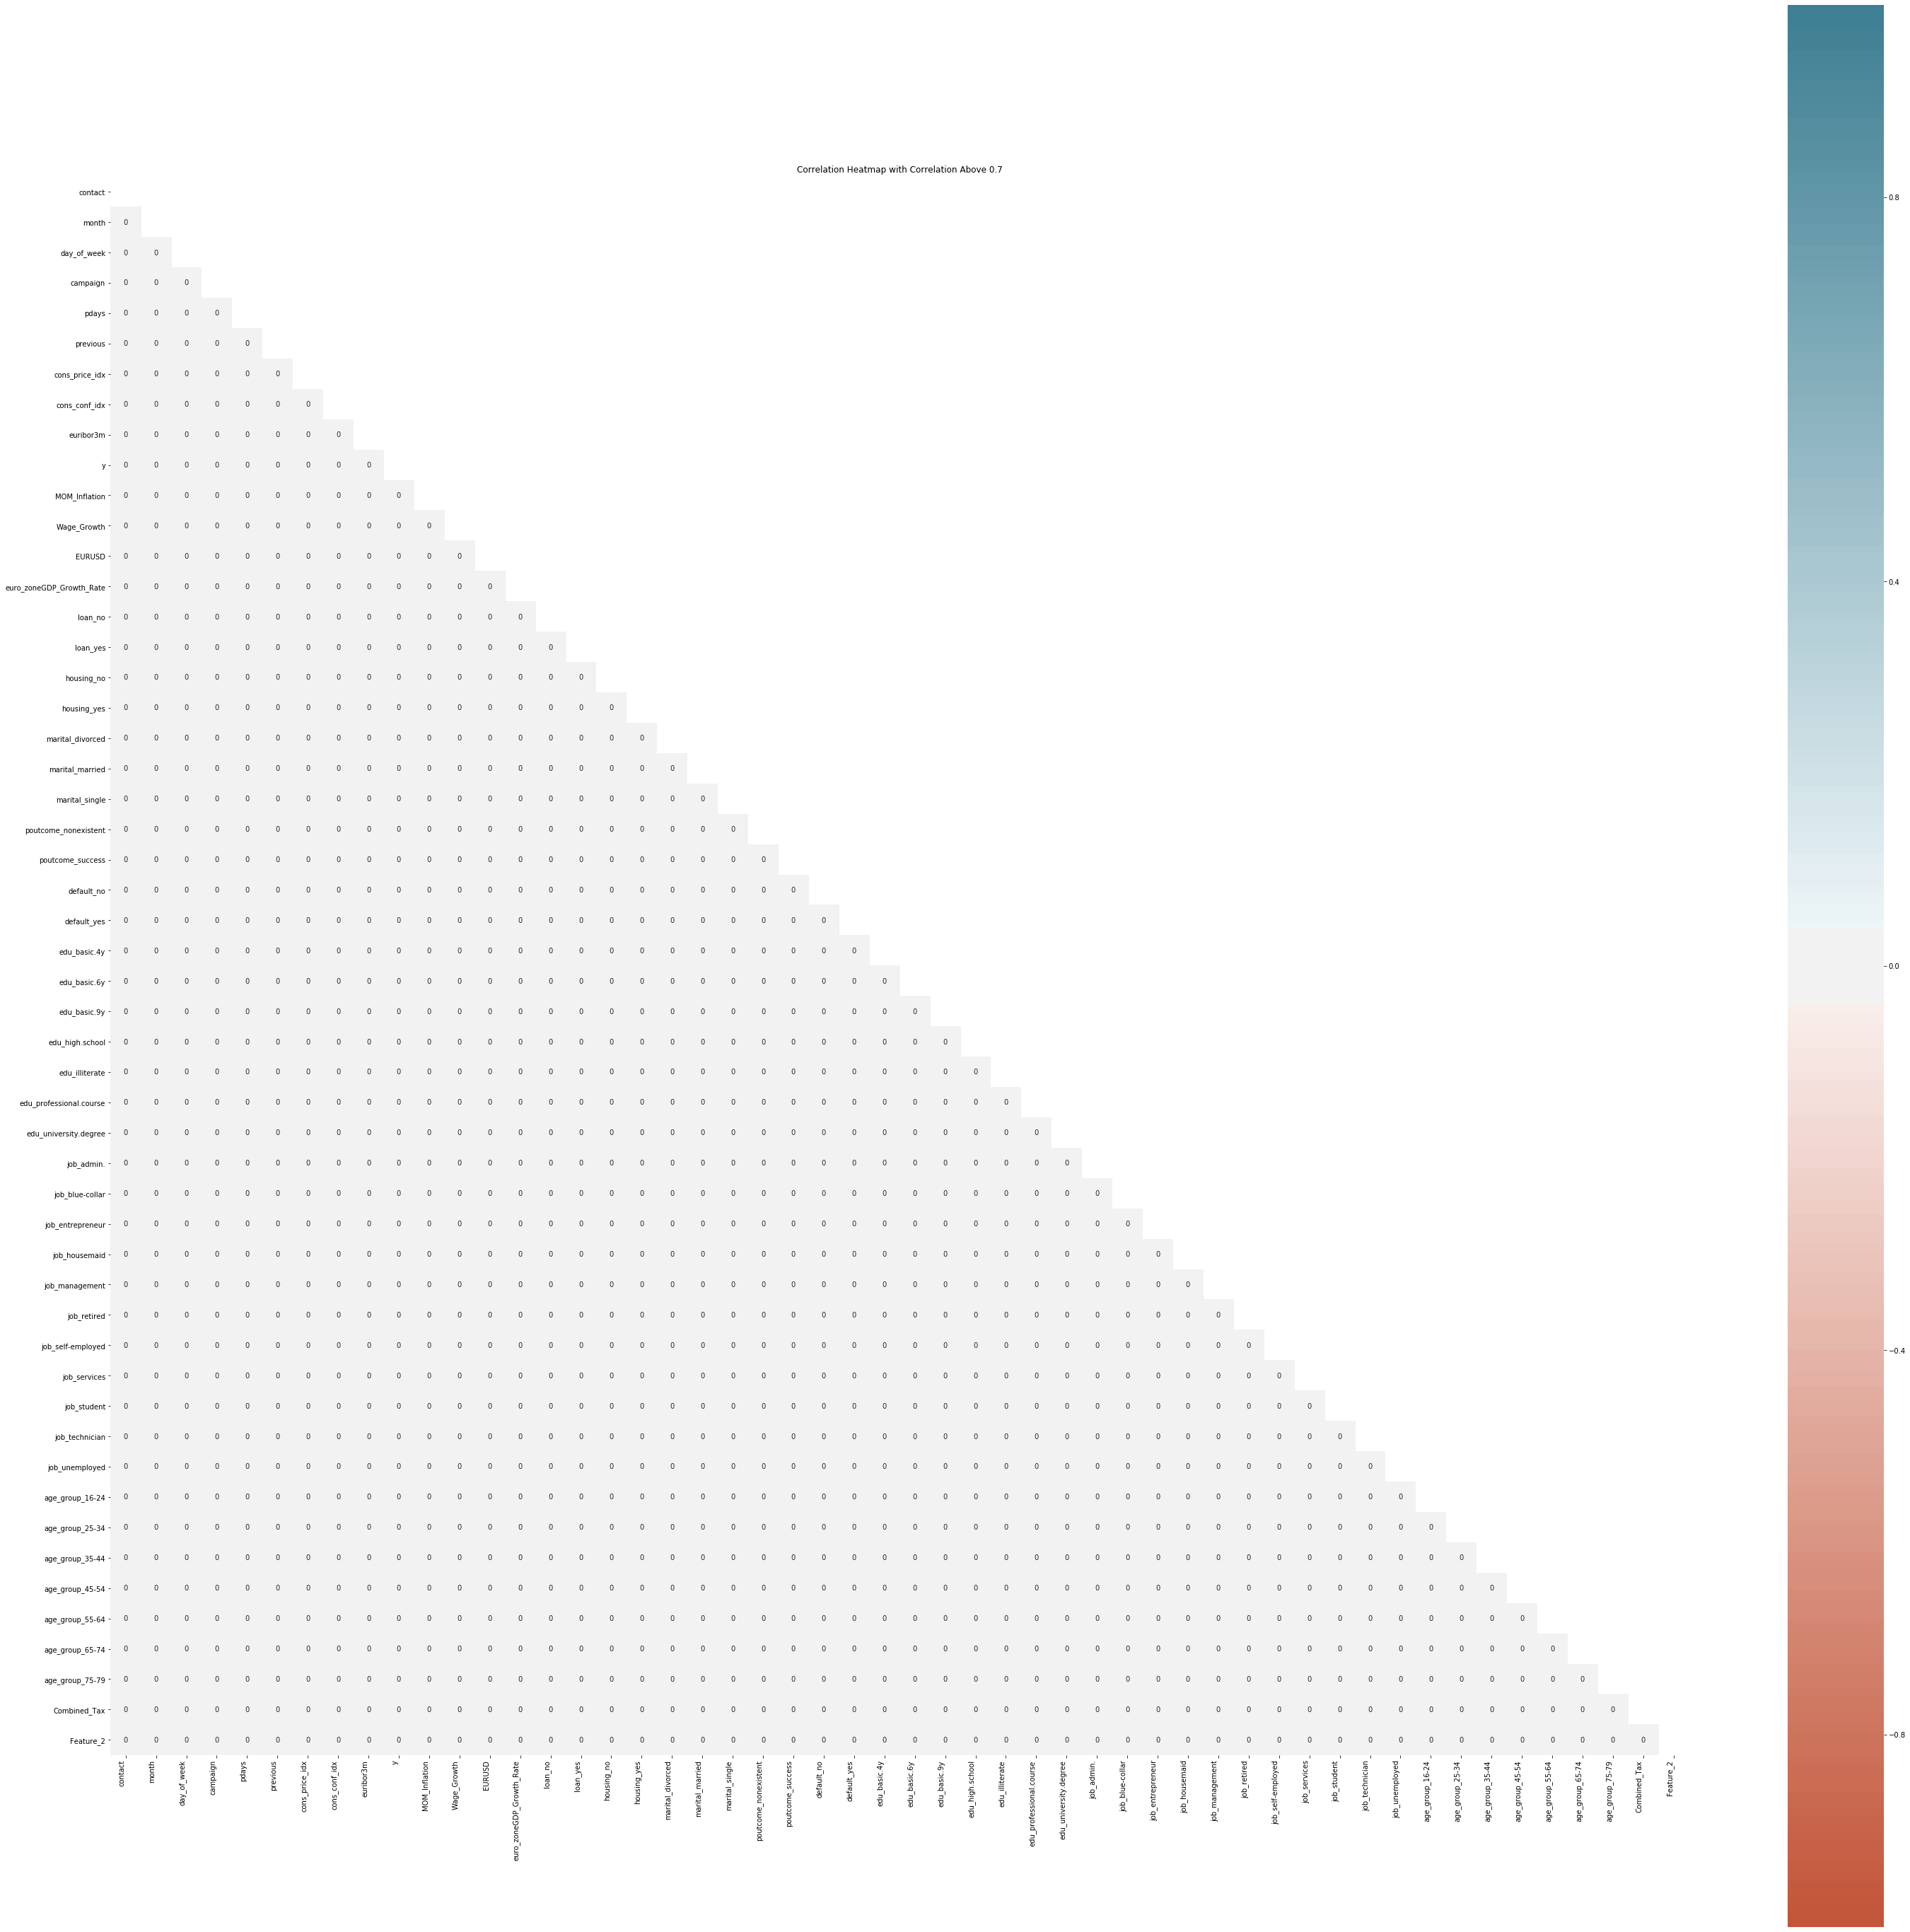

''

In [93]:
#Plotting a customised correlation heatmap.
plt.figure(figsize=(50,50))
ax = sns.heatmap(
    data_cleaned.corr()>0.7, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True,
    mask = corr2,
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    horizontalalignment='right'
)
plt.title('Correlation Heatmap with Correlation Above 0.7'),
plt.show()
;

As expected, our correlation heatmap no longer shows multicolinearity between the features. We have completed our Feature Engineering process. We can now save the dataframe into a CSV called data_feat.csv. This can be found in the Data folder. In the next section, we will move onto the modelling.

In [94]:
data_cleaned.to_csv('../Data/data_feat.csv')